In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import spacy

In [2]:
train_df = pd.read_csv('data/Train.csv')
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
train_df = train_df.dropna()

In [4]:
print(len(train_df))

40000


In [5]:
train_df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
train_df.label.value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

In [7]:
random.choice(train_df.text)

"I saw a preview of Freebird at the Isle of Man TT as i had heard about it in a couple of motorcycle mags. Although i was over mainly for the racing, the lure of seeing Phil Daniels in a motorcycle movie (yes i love Quadrophenia like everyone else) proved enough to get me away from the beer and partying. At last! we've done it! us British have actually made a great motorcycle film (and no it's not like Torque) this is up there with the best of British comedy. Mark my words, this is Phil Daniels best screen performance, and as far as Geoff Bell is concerned, there's a new British legend making his name felt. I loved Gary Stretch in Shane Meadows' fantastic Dead Mans Shoes and here he gives a quietly touching performance that he can proudly add to his growing film reputation. This is a film not just for us Bikers, but I think for everyone (even my girlfriend loved it). I hope it gets the same brilliant response on the mainland as it got at the Isle of Man. I'm not going to go into the de

In [8]:
def removeBr(text:str):
    text = text.replace('\\','')
    return text.replace('<br />','')

In [9]:
train_df['text'] = train_df.text.apply(lambda x : removeBr(x))

(-0.49, 1.49, 0.0, 21019.95)

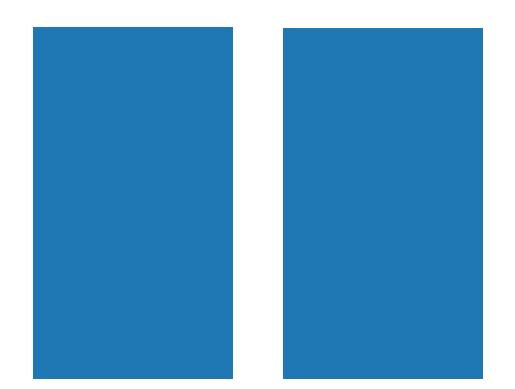

In [10]:
plt.bar(list(set(train_df.label)),list(train_df.label.value_counts()))
plt.axis('off')

In [11]:
max_len = max([len(x) for x in train_df.text])
max_len

13584

In [12]:
tokens = ''

for i in list(train_df.text):
    for j in list(i):
        if j in tokens:
            continue
        else:
            tokens += j

tokens
        

'I grewup(b.1965)atchindlovTsAmyW"f,VSNCkHGJFUjDx-:BM\'Rq?!YLE/Oz*ZKQ87P0234;é_X%\x85~&$\x96+#`{}[]ò=£\x97ü\x91@ûí´èÆà\xa0ō|öçïä\x95ýá><\x84ñÜôåâóêî\x80^–Ê½’“”‘…ù\xadøãÀ¾ß\tŻÓë°úÄ¨È·«»Ö\x9a\x8e\x9eºığìÉ，、ðÞ★¡″§\x8dיגאלכרמוןÏÅÃ®ÁÇÂ₤³Õæ¢¤\uf0b7\x10¦¿'

In [13]:
char_to_tok = {k:v for v,k in enumerate(list(tokens))}
char_to_tok

{'I': 0,
 ' ': 1,
 'g': 2,
 'r': 3,
 'e': 4,
 'w': 5,
 'u': 6,
 'p': 7,
 '(': 8,
 'b': 9,
 '.': 10,
 '1': 11,
 '9': 12,
 '6': 13,
 '5': 14,
 ')': 15,
 'a': 16,
 't': 17,
 'c': 18,
 'h': 19,
 'i': 20,
 'n': 21,
 'd': 22,
 'l': 23,
 'o': 24,
 'v': 25,
 'T': 26,
 's': 27,
 'A': 28,
 'm': 29,
 'y': 30,
 'W': 31,
 '"': 32,
 'f': 33,
 ',': 34,
 'V': 35,
 'S': 36,
 'N': 37,
 'C': 38,
 'k': 39,
 'H': 40,
 'G': 41,
 'J': 42,
 'F': 43,
 'U': 44,
 'j': 45,
 'D': 46,
 'x': 47,
 '-': 48,
 ':': 49,
 'B': 50,
 'M': 51,
 "'": 52,
 'R': 53,
 'q': 54,
 '?': 55,
 '!': 56,
 'Y': 57,
 'L': 58,
 'E': 59,
 '/': 60,
 'O': 61,
 'z': 62,
 '*': 63,
 'Z': 64,
 'K': 65,
 'Q': 66,
 '8': 67,
 '7': 68,
 'P': 69,
 '0': 70,
 '2': 71,
 '3': 72,
 '4': 73,
 ';': 74,
 'é': 75,
 '_': 76,
 'X': 77,
 '%': 78,
 '\x85': 79,
 '~': 80,
 '&': 81,
 '$': 82,
 '\x96': 83,
 '+': 84,
 '#': 85,
 '`': 86,
 '{': 87,
 '}': 88,
 '[': 89,
 ']': 90,
 'ò': 91,
 '=': 92,
 '£': 93,
 '\x97': 94,
 'ü': 95,
 '\x91': 96,
 '@': 97,
 'û': 98,
 'í': 99

In [14]:
def label_encoder(text):
    L = []
    for i in list(text):
        L.append(char_to_tok[i])
    for _ in range(len(L),450):
        L.append(-1)
    return L

In [15]:
train_df['label_encoded'] = train_df.text.apply(lambda x : label_encoder(x))

In [16]:
train_df.head()

,text,label,label_encoded
0,I grew up (b. 1965) watching and loving the Th...,0,"[0, 1, 2, 3, 4, 5, 1, 6, 7, 1, 8, 9, 10, 1, 11..."
1,"When I put this movie in my DVD player, and sa...",0,"[31, 19, 4, 21, 1, 0, 1, 7, 6, 17, 1, 17, 19, ..."
2,Why do people who do not know what a particula...,0,"[31, 19, 30, 1, 22, 24, 1, 7, 4, 24, 7, 23, 4,..."
3,Even though I have great interest in Biblical ...,0,"[59, 25, 4, 21, 1, 17, 19, 24, 6, 2, 19, 1, 0,..."
4,Im a die hard Dads Army fan and nothing will e...,1,"[0, 29, 1, 16, 1, 22, 20, 4, 1, 19, 16, 3, 22,..."


In [17]:
nlp = spacy.load('en_core_web_lg')

In [18]:
def spacy_preprocess(text):
    L = []
    doc = nlp(text)
    return doc.vector

In [ ]:
train_df['spacy_encoded'] = train_df.text.apply(lambda x : spacy_preprocess(x))

In [ ]:
df.to_csv('output.csv', index=False)